In [3]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [4]:
# load dataset
df = pd.read_csv('data/train-data.csv')
df_test = pd.read_csv('data/test-data.csv')
df.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [7]:
# remove "Unnamed: 0" columns
df = df.iloc[:,1:]
df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   New_Price  Price  
0        NaN   1.75  
1        NaN  12.50  
2  8.61 Lakh   4.50  
3        NaN   6.00  
4        NaN  17.74

In [8]:
df.describe()

Year  Kilometers_Driven        Seats        Price
count  6019.000000       6.019000e+03  5977.000000  6019.000000
mean   2013.358199       5.873838e+04     5.278735     9.479468
std       3.269742       9.126884e+04     0.808840    11.187917
min    1998.000000       1.710000e+02     0.000000     0.440000
25%    2011.000000       3.400000e+04     5.000000     3.500000
50%    2014.000000       5.300000e+04     5.000000     5.640000
75%    2016.000000       7.300000e+04     5.000000     9.950000
max    2019.000000       6.500000e+06    10.000000   160.000000

In [9]:
df.shape

(6019, 13)

In [6]:
# drop Unnamed: 0 and New_Price
# df.drop(columns = ['Unnamed: 0','New_Price'], inplace = True)

In [10]:
# check for duplicated rows
# df.duplicated().sum()

In [12]:
# list unique values of categorical features (Location, Fuel_Type, Transmission, Owner_Type)
print(df['Location'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner_Type'].unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


In [15]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [17]:
# drop rows which contains NULL values
print("Shape of train data Before dropping any Row: ",df.shape)
df = df[df['Mileage'].notna()]
print("Shape of train data After dropping Rows with NULL values in Mileage: ",df.shape)
df = df[df['Engine'].notna()]
print("Shape of train data After dropping Rows with NULL values in Engine : ",df.shape)
df = df[df['Power'].notna()]
print("Shape of train data After dropping Rows with NULL values in Power  : ",df.shape)
df = df[df['Seats'].notna()]
print("Shape of train data After dropping Rows with NULL values in Seats  : ",df.shape)

Shape of train data Before dropping any Row:  (6019, 13)
Shape of train data After dropping Rows with NULL values in Mileage:  (6017, 13)
Shape of train data After dropping Rows with NULL values in Engine :  (5981, 13)
Shape of train data After dropping Rows with NULL values in Power  :  (5981, 13)
Shape of train data After dropping Rows with NULL values in Seats  :  (5975, 13)


In [19]:
# after using .notna() we have many absent indexes 
# (Eg: If row no 47 was droped then after 46 we have 48 index), 
# so reset the index and droping the present index
df = df.reset_index(drop=True)

In [21]:
# extracting data
for i in range(df.shape[0]):
    df.at[i, 'Company'] = df['Name'][i].split()[0]
    df.at[i, 'Mileage(km/kg)'] = str(df['Mileage'][i]).split()[0]
    df.at[i, 'Engine(CC)'] = df['Engine'][i].split()[0]
    df.at[i, 'Power(bhp)'] = df['Power'][i].split()[0]

In [23]:
df['Mileage(km/kg)'] = df['Mileage(km/kg)'].astype(float)
df['Engine(CC)'] = df['Engine(CC)'].astype(float)

In [25]:
# change Power(bhp) to float an error occured (Can't convert str to float : null). 
# so, found some cell where having values: 'null bhp'
x = 'n'
count = 0
position = []
for i in range(df.shape[0]):
    if df['Power(bhp)'][i]=='null':
        x = 'Y'
        count = count + 1
        position.append(i)
print(x)
print(count)
print(position)

Y
103
[76, 79, 89, 120, 143, 225, 242, 259, 304, 305, 383, 421, 425, 440, 469, 572, 628, 644, 645, 735, 744, 824, 910, 921, 929, 1063, 1138, 1148, 1266, 1313, 1338, 1380, 1411, 1546, 1569, 1640, 1663, 1848, 1989, 2043, 2118, 2152, 2250, 2254, 2292, 2328, 2377, 2425, 2434, 2481, 2485, 2511, 2561, 2579, 2616, 2621, 2868, 3010, 3038, 3081, 3166, 3224, 3266, 3414, 3491, 3506, 3562, 3601, 3611, 3618, 3642, 3706, 3868, 3900, 3969, 4046, 4049, 4318, 4321, 4593, 4672, 4676, 4706, 4792, 4848, 4862, 4914, 5024, 5078, 5186, 5383, 5395, 5415, 5486, 5490, 5604, 5712, 5716, 5818, 5830, 5881, 5899, 5941]


In [26]:
df = df.drop(df.index[position])
df = df.reset_index(drop=True)

In [27]:
df['Power(bhp)'] = df['Power(bhp)'].astype(float)

In [28]:
df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage   Engine      Power  Seats  \
0       CNG       Manual      First    26.60   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First    19.67  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First    18.20  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First    20.77  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second    15.20  1968 CC  140.8 bhp    5.0   

   New_Price  Price  Company  Mileage(km/kg)  Engine(CC)  Power(bhp)  
0        NaN   1.75   Maruti           26.60       998.0       58.16  
1        NaN  12.50  Hyundai           19.67      1582.0      126.20  
2  8.61 Lakh   4.50    Honda           18.20      1199.0       88.70  
3        NaN   6.00   Maruti           20.77      1248.0       88.76  
4        NaN  17.74     Audi           15.20      1968.0      140.80

In [29]:
for i in range(df.shape[0]):
    if pd.isnull(df.loc[i,'New_Price']) == False:
        df.at[i,'New_car_Price'] = df['New_Price'][i].split()[0]

In [31]:
df['New_car_Price'] = df['New_car_Price'].astype(float)

In [32]:
# delete columns
df.drop(["Name"],axis=1,inplace=True)
df.drop(["Mileage"],axis=1,inplace=True)
df.drop(["Engine"],axis=1,inplace=True)
df.drop(["Power"],axis=1,inplace=True)
df.drop(["New_Price"],axis=1,inplace=True)

In [38]:
## data vis

# price
df['Price'].describe()

count    5872.000000
mean        9.603919
std        11.249453
min         0.440000
25%         3.517500
50%         5.750000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

(0.0, 160.0)

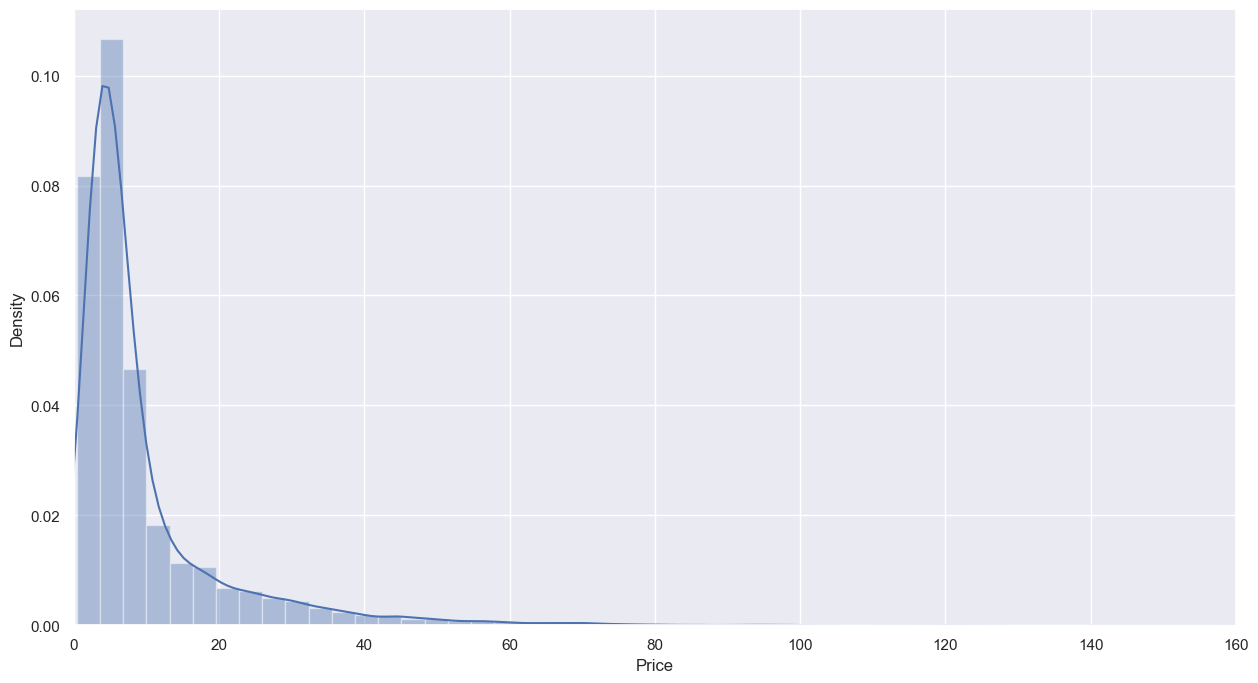

In [39]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(df['Price'])
plt.xlim([0,160])

In [40]:
# fuel type
df['Fuel_Type'].describe()

count       5872
unique         4
top       Diesel
freq        3152
Name: Fuel_Type, dtype: object

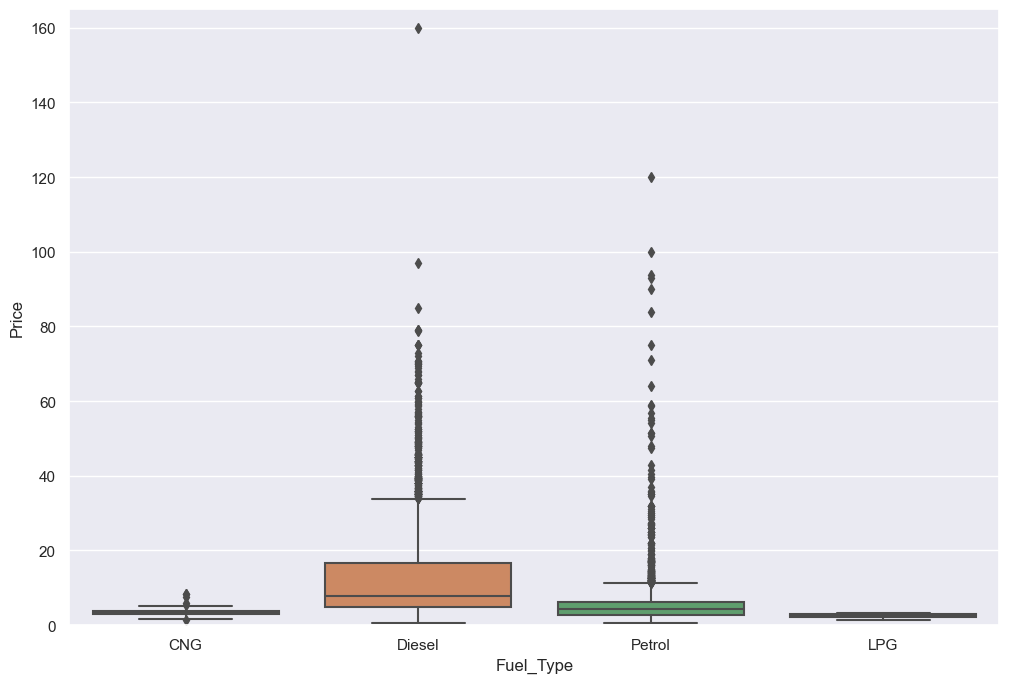

In [41]:
var = 'Fuel_Type'
data = pd.concat([df['Price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

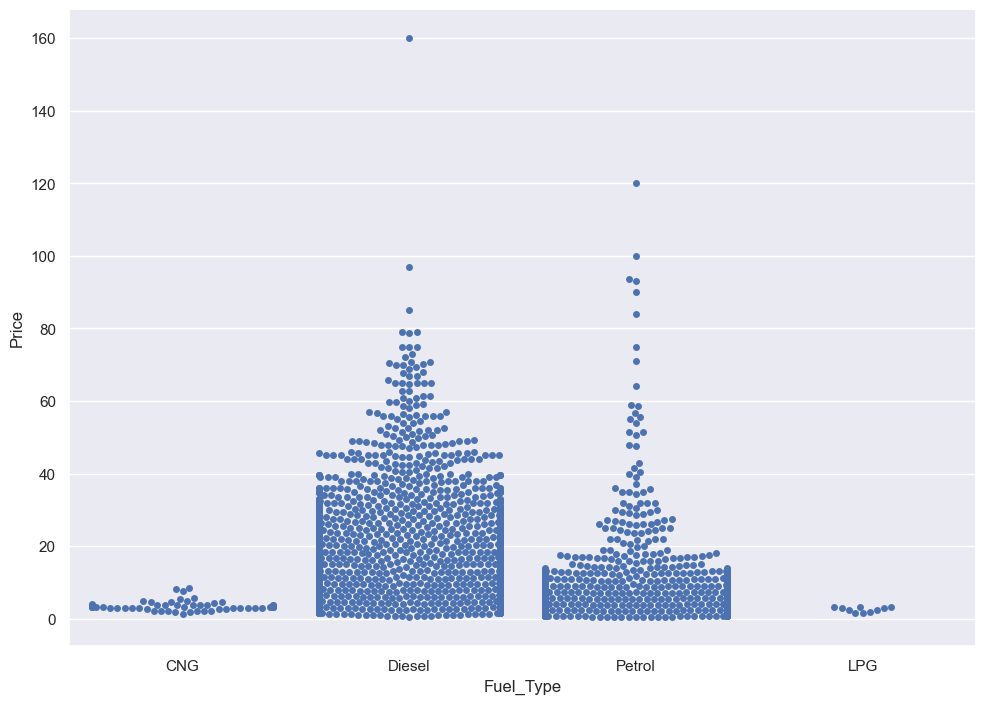

In [42]:
var = 'Fuel_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.swarmplot(x = var, y ='Price', data = df)

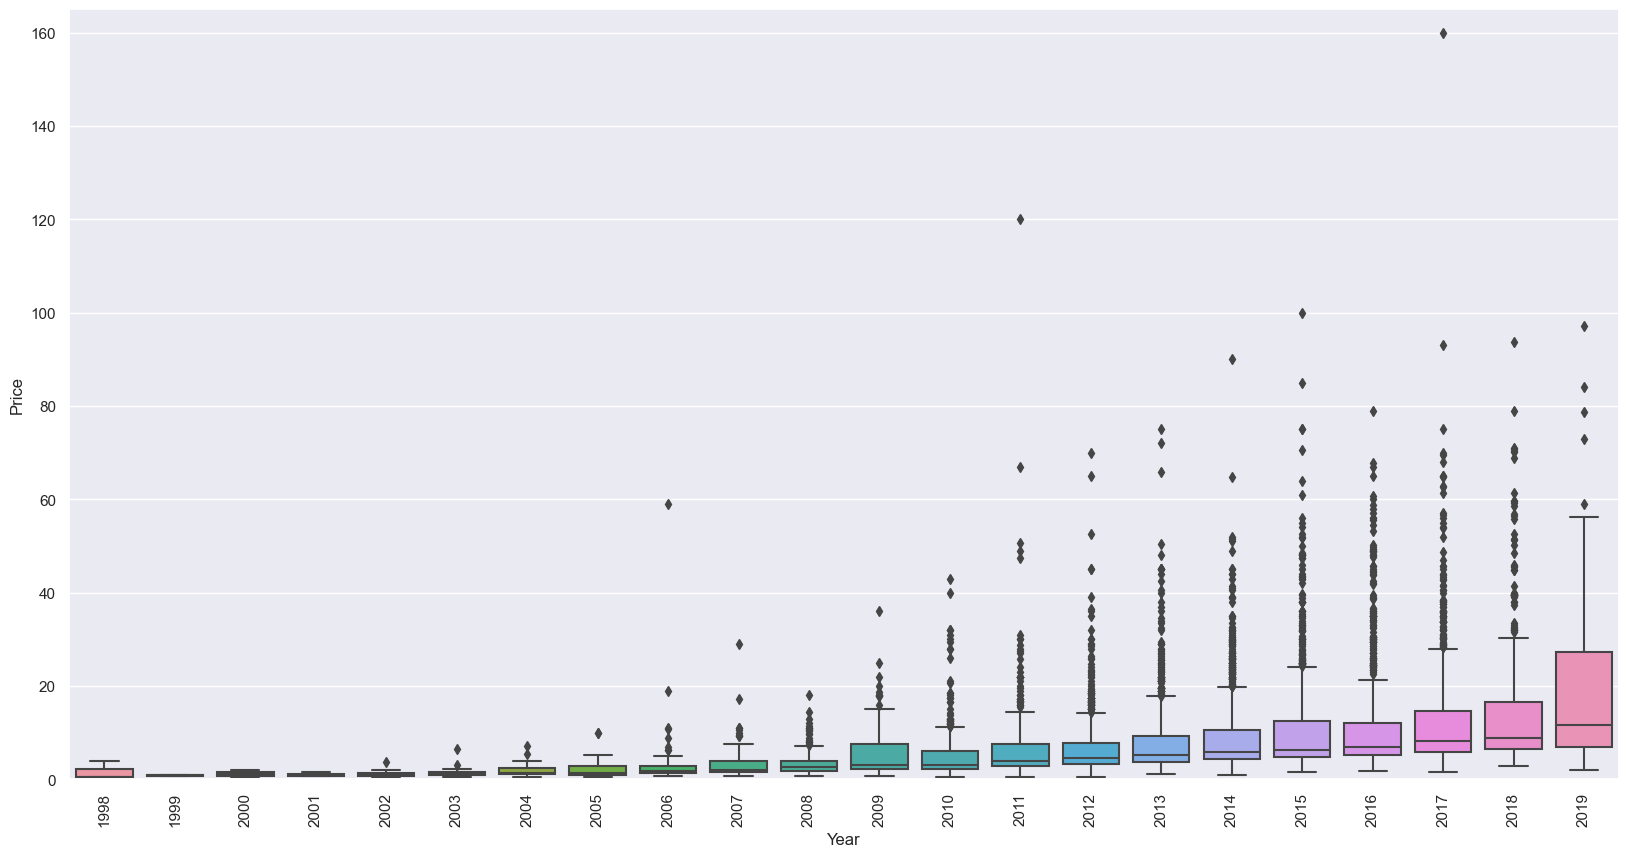

In [43]:
# year
var = 'Year'
data = pd.concat([df['Price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);
plt.xticks(rotation=90);

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

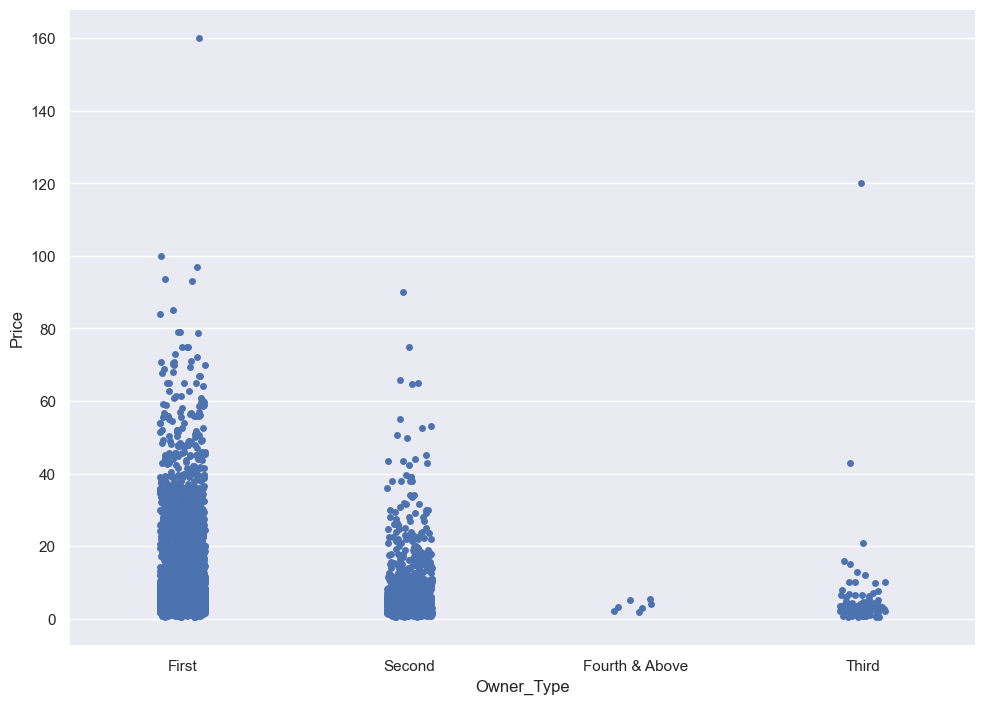

In [44]:
var = 'Owner_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y ='Price', data = df) 

<Figure size 2000x1000 with 0 Axes>

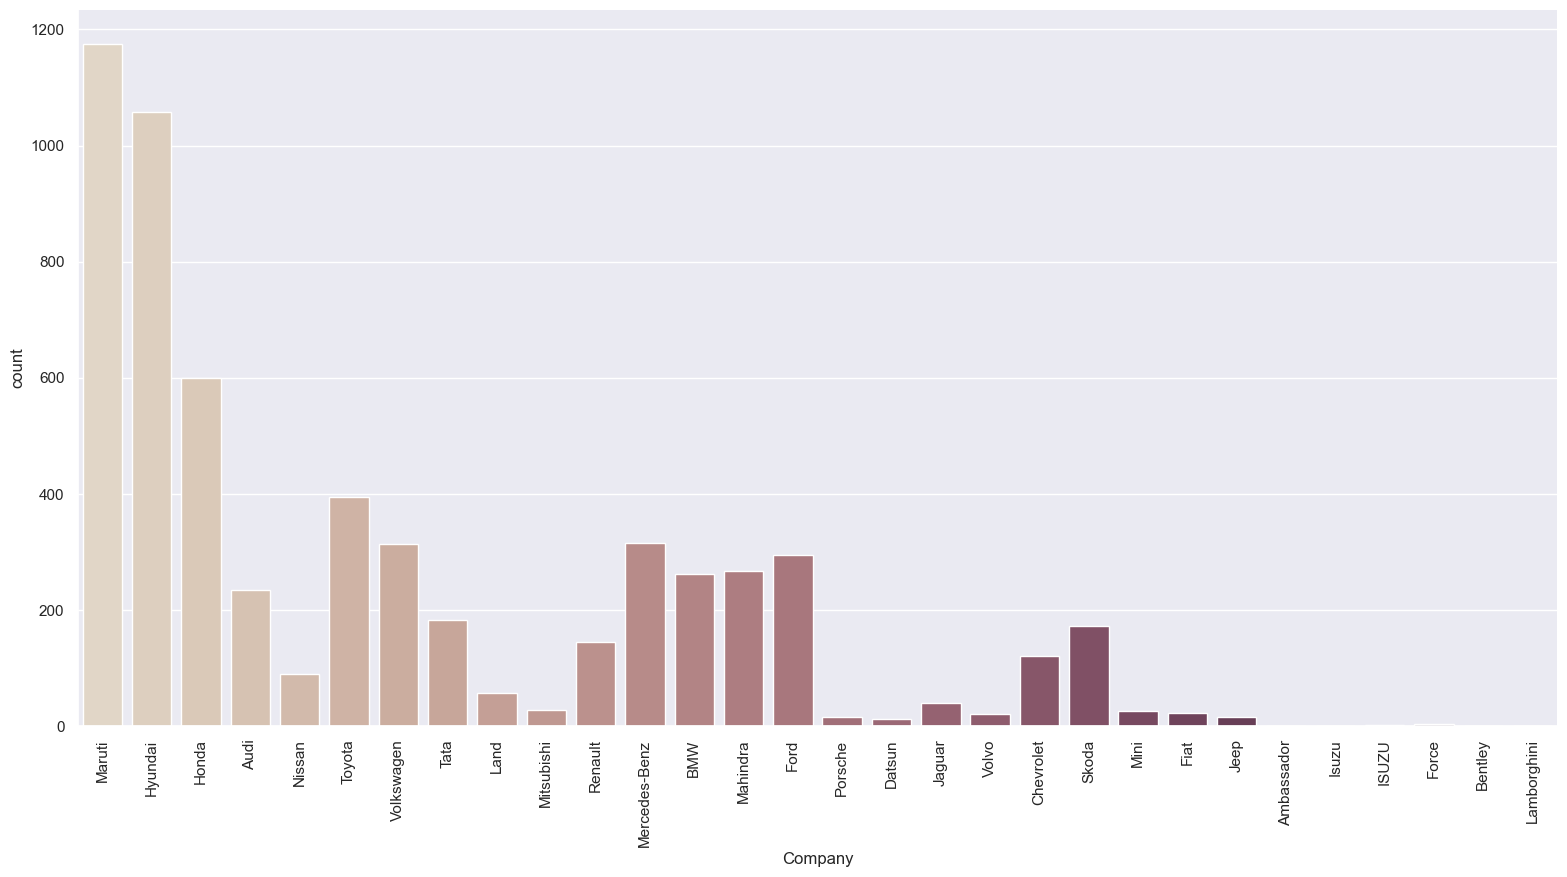

In [45]:
# company
var = "Company"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=df);
plt.xticks(rotation=90);

In [49]:
# working with categorical data

# 5 categorical features (Location, Fuel_Type, Transmission, Owner_Type, Company)
# using 1 of 2 approaches
# OneHotEncoder when order does NOT matter and LabelEncoder when order matters

# Location
var = 'Location'
df[var].value_counts()

Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        402
Bangalore     347
Ahmedabad     220
Name: Location, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

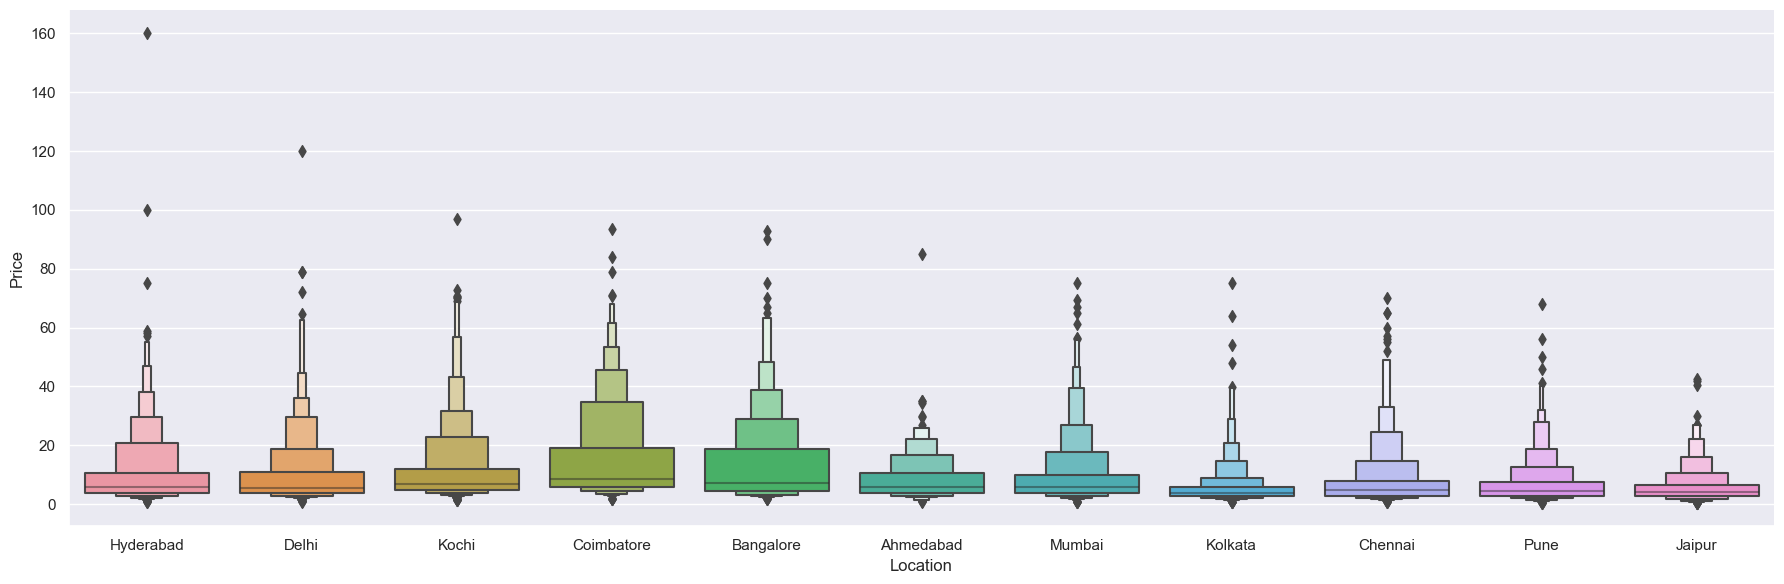

In [47]:
# Location vs Price
sns.catplot(y='Price',x=var,data= df.sort_values('Price',ascending=False),\
            kind="boxen",height=6, aspect=3)
plt.show

In [48]:
# using 1 hot encoding
Location = df[[var]]
Location = pd.get_dummies(Location, drop_first=True)
Location.head()

Location_Bangalore  Location_Chennai  Location_Coimbatore  Location_Delhi  \
0                   0                 0                    0               0   
1                   0                 0                    0               0   
2                   0                 1                    0               0   
3                   0                 1                    0               0   
4                   0                 0                    1               0   

   Location_Hyderabad  Location_Jaipur  Location_Kochi  Location_Kolkata  \
0                   0                0               0                 0   
1                   0                0               0                 0   
2                   0                0               0                 0   
3                   0                0               0                 0   
4                   0                0               0                 0   

   Location_Mumbai  Location_Pune  
0                1              0  
1                0              1  
2                0              0  
3                0              0  
4                0              0

In [50]:
# Fuel Type
var = 'Fuel_Type'
df[var].value_counts()

Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

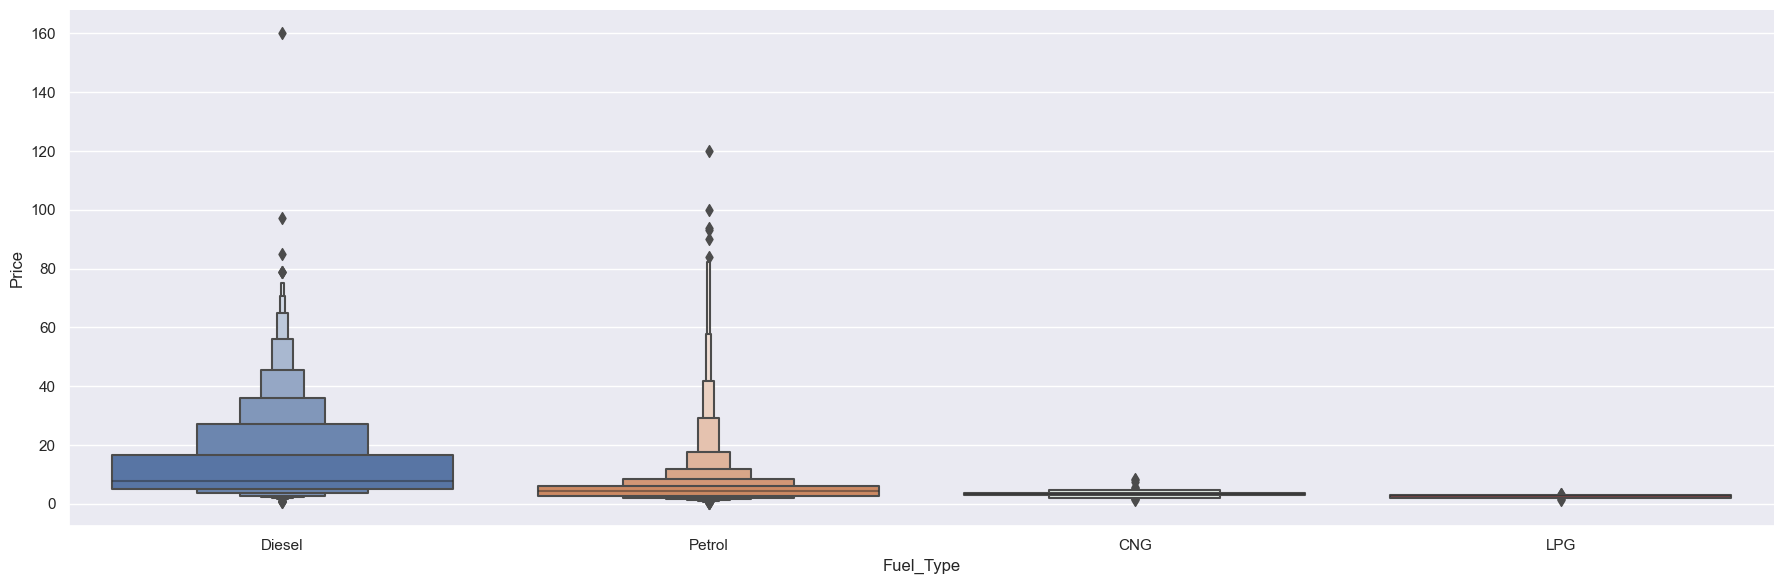

In [51]:
# Fuel_Type vs Price
sns.catplot(y='Price', x=var, data=df.sort_values('Price',ascending=False),\
            kind="boxen",height=6, aspect=3)
plt.show

In [52]:
# using 1 hot encoding
Fuel_Type = df[[var]]
Fuel_Type = pd.get_dummies(Fuel_Type, drop_first=True)
Fuel_Type.head()

Fuel_Type_Diesel  Fuel_Type_LPG  Fuel_Type_Petrol
0                 0              0                 0
1                 1              0                 0
2                 0              0                 1
3                 1              0                 0
4                 1              0                 0

In [53]:
# Transmission
var = 'Transmission'
df[var].value_counts()

Manual       4170
Automatic    1702
Name: Transmission, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

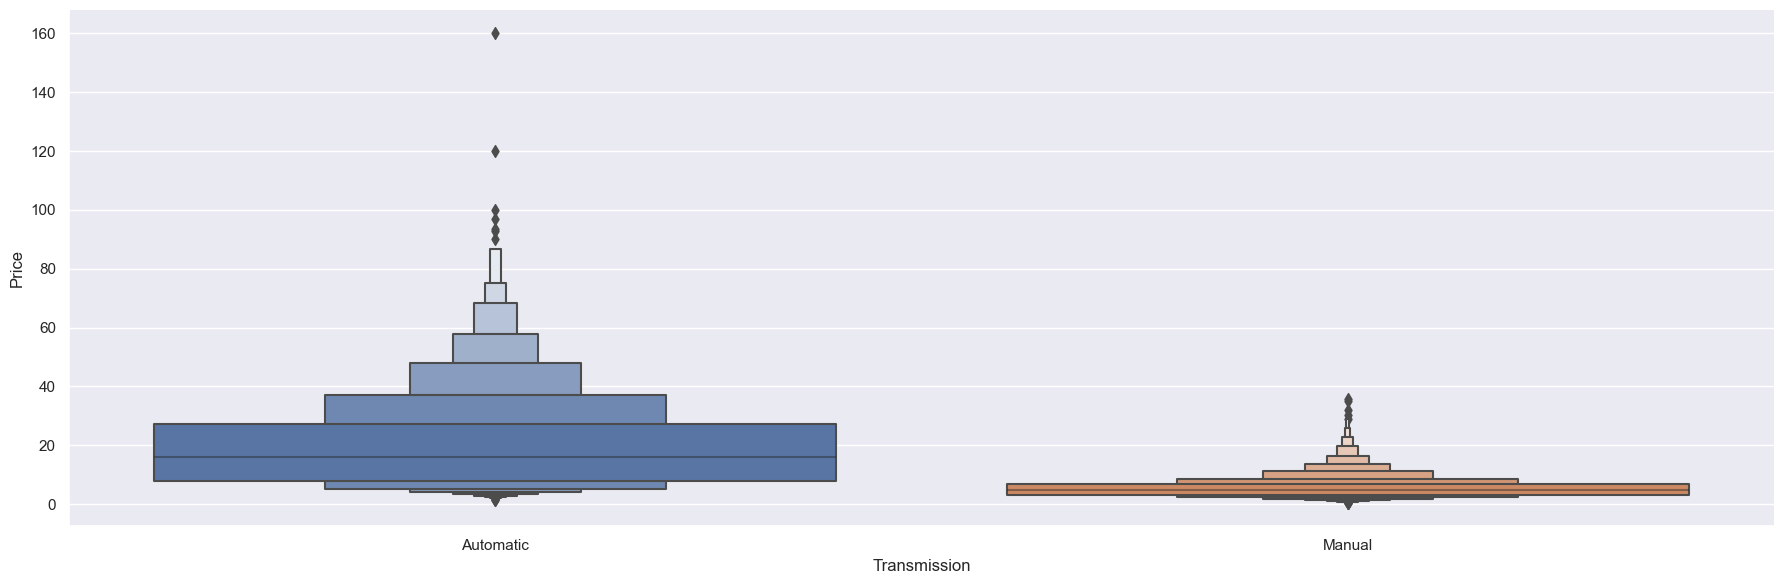

In [54]:
# Transmission vs Price
sns.catplot(y='Price', x=var, data=df.sort_values('Price',ascending=False),\
            kind="boxen",height=6, aspect=3)
plt.show

In [55]:
# using 1 hot encoding
Transmission = df[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

Transmission_Manual
0                    1
1                    1
2                    1
3                    1
4                    0

In [56]:
# Owner_Type
var = 'Owner_Type'
df[var].value_counts()

First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64

In [57]:
# Owner_Type column has ordered data so, using Label Encoding
df.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
df.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission  Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual           1   
1        Pune  2015              41000    Diesel       Manual           1   
2     Chennai  2011              46000    Petrol       Manual           1   
3     Chennai  2012              87000    Diesel       Manual           1   
4  Coimbatore  2013              40670    Diesel    Automatic           2   

   Seats  Price  Company  Mileage(km/kg)  Engine(CC)  Power(bhp)  \
0    5.0   1.75   Maruti           26.60       998.0       58.16   
1    5.0  12.50  Hyundai           19.67      1582.0      126.20   
2    5.0   4.50    Honda           18.20      1199.0       88.70   
3    7.0   6.00   Maruti           20.77      1248.0       88.76   
4    5.0  17.74     Audi           15.20      1968.0      140.80   

   New_car_Price  
0            NaN  
1            NaN  
2           8.61  
3            NaN  
4            NaN

In [58]:
# Company
var = 'Company'
df[var].value_counts()

Maruti           1175
Hyundai          1058
Honda             600
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          268
BMW               262
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: Company, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

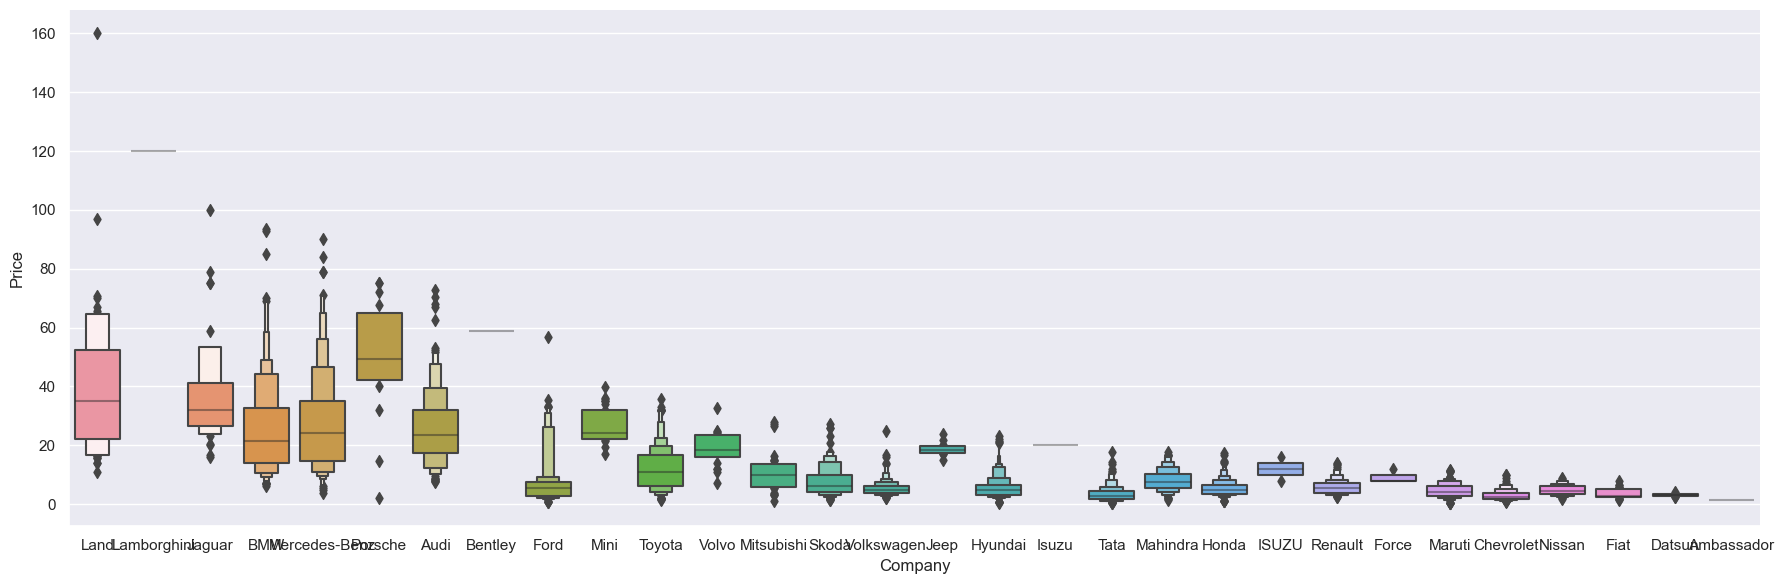

In [59]:
# Company vs Price
sns.catplot(y='Price',x=var,data= df.sort_values('Price',ascending=False),\
            kind="boxen",height=6, aspect=3)
plt.show

In [61]:
# it has a lot of variation so, drop it
df.drop(["Company"],axis=1,inplace=True)

In [63]:
# combine all data frames
final_train= pd.concat([df,Location,Fuel_Type,Transmission], axis=1)
final_train.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission  Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual           1   
1        Pune  2015              41000    Diesel       Manual           1   
2     Chennai  2011              46000    Petrol       Manual           1   
3     Chennai  2012              87000    Diesel       Manual           1   
4  Coimbatore  2013              40670    Diesel    Automatic           2   

   Seats  Price  Mileage(km/kg)  Engine(CC)  ...  Location_Hyderabad  \
0    5.0   1.75           26.60       998.0  ...                   0   
1    5.0  12.50           19.67      1582.0  ...                   0   
2    5.0   4.50           18.20      1199.0  ...                   0   
3    7.0   6.00           20.77      1248.0  ...                   0   
4    5.0  17.74           15.20      1968.0  ...                   0   

   Location_Jaipur  Location_Kochi  Location_Kolkata  Location_Mumbai  \
0                0               0                 0                1   
1                0               0                 0                0   
2                0               0                 0                0   
3                0               0                 0                0   
4                0               0                 0                0   

   Location_Pune  Fuel_Type_Diesel  Fuel_Type_LPG  Fuel_Type_Petrol  \
0              0                 0              0                 0   
1              1                 1              0                 0   
2              0                 0              0                 1   
3              0                 1              0                 0   
4              0                 1              0                 0   

   Transmission_Manual  
0                    1  
1                    1  
2                    1  
3                    1  
4                    0  

[5 rows x 26 columns]

In [64]:
# drop the original column (Location, Fuel_Type, Transmission) plus New_car_Price
cols_to_remove = ["Location","Fuel_Type","Transmission","New_car_Price"]
final_train.drop(cols_to_remove,axis=1,inplace=True)
final_train.head()

Year  Kilometers_Driven  Owner_Type  Seats  Price  Mileage(km/kg)  \
0  2010              72000           1    5.0   1.75           26.60   
1  2015              41000           1    5.0  12.50           19.67   
2  2011              46000           1    5.0   4.50           18.20   
3  2012              87000           1    7.0   6.00           20.77   
4  2013              40670           2    5.0  17.74           15.20   

   Engine(CC)  Power(bhp)  Location_Bangalore  Location_Chennai  ...  \
0       998.0       58.16                   0                 0  ...   
1      1582.0      126.20                   0                 0  ...   
2      1199.0       88.70                   0                 1  ...   
3      1248.0       88.76                   0                 1  ...   
4      1968.0      140.80                   0                 0  ...   

   Location_Hyderabad  Location_Jaipur  Location_Kochi  Location_Kolkata  \
0                   0                0               0                 0   
1                   0                0               0                 0   
2                   0                0               0                 0   
3                   0                0               0                 0   
4                   0                0               0                 0   

   Location_Mumbai  Location_Pune  Fuel_Type_Diesel  Fuel_Type_LPG  \
0                1              0                 0              0   
1                0              1                 1              0   
2                0              0                 0              0   
3                0              0                 1              0   
4                0              0                 1              0   

   Fuel_Type_Petrol  Transmission_Manual  
0                 0                    1  
1                 0                    1  
2                 1                    1  
3                 0                    1  
4                 0                    0  

[5 rows x 22 columns]

In [66]:
# preparing test data
final_train.shape

(5872, 22)

In [71]:
df_test = df_test.iloc[:,1:]

In [73]:
df_test.columns

Index(['Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Mileage(km/kg)',
       'Engine(CC)', 'Power(bhp)', 'New_car_Price'],
      dtype='object')

In [74]:
print("Shape of test data Before dropping any Row: ",df.shape)
df_test = df_test[df_test['Mileage(km/kg)'].notna()]
print("Shape of test data After dropping Rows with NULL values in Mileage: ",df_test.shape)
df_test = df_test[df_test['Engine(CC)'].notna()]
print("Shape of test data After dropping Rows with NULL values in Engine : ",df_test.shape)
df_test = df_test[df_test['Power(bhp)'].notna()]
print("Shape of test data After dropping Rows with NULL values in Power  : ",df_test.shape)
df_test = df_test[df_test['Seats'].notna()]
print("Shape of test data After dropping Rows with NULL values in Seats  : ",df_test.shape)
print('Droping null done')

Shape of test data Before dropping any Row:  (5872, 12)
Shape of test data After dropping Rows with NULL values in Mileage:  (1201, 8)
Shape of test data After dropping Rows with NULL values in Engine :  (1201, 8)
Shape of test data After dropping Rows with NULL values in Power  :  (1201, 8)
Shape of test data After dropping Rows with NULL values in Seats  :  (1201, 8)
Droping null done


In [75]:
df_test = df_test.reset_index(drop=True)
print('Index reset done')

Index reset done


In [80]:
for i in range(df_test.shape[0]):
    df_test.at[i, 'Mileage(km/kg)'] = str(df_test['Mileage(km/kg)'][i]).split()[0]
    df_test.at[i, 'Engine(CC)'] = str(df_test['Engine(CC)'][i]).split()[0]
    df_test.at[i, 'Power(bhp)'] = str(df_test['Power(bhp)'][i]).split()[0]
print('Split Done')

Split Done


In [81]:
df_test['Mileage(km/kg)'] = df_test['Mileage(km/kg)'].astype(float)
df_test['Engine(CC)'] = df_test['Engine(CC)'].astype(float)
print('casting 1 Done') 

casting 1 Done


In [82]:
position = []
for i in range(df_test.shape[0]):
    if df_test['Power(bhp)'][i]=='null':
        position.append(i)
        
df_test = df_test.drop(df_test.index[position])
df_test = df_test.reset_index(drop=True) 

df_test['Power(bhp)'] = df_test['Power(bhp)'].astype(float)
print('casting 2 Done')

casting 2 Done


In [86]:
for i in range(df_test.shape[0]):
    if pd.isnull(df_test.loc[i,'New_car_Price']) == False:
        df_test.at[i,'New_car_Price'] = str(df_test['New_car_Price'][i]).split()[0]

In [87]:
df_test['New_car_Price'] = df_test['New_car_Price'].astype(float)

In [89]:
df_test.head(2)

Fuel_Type Transmission Owner_Type  Seats  Mileage(km/kg)  Engine(CC)  \
0       CNG       Manual      First    4.0           32.26       998.0   
1    Petrol       Manual     Second    5.0           24.70       796.0   

   Power(bhp)  New_car_Price  
0        58.2            NaN  
1        47.3            NaN

In [90]:
# df_test.drop(["Mileage"],axis=1,inplace=True)
# df_test.drop(["Engine"],axis=1,inplace=True)
# df_test.drop(["Power"],axis=1,inplace=True)
# df_test.drop(["New_Price"],axis=1,inplace=True)

In [92]:
# var = 'Location'
# Location = df_test[[var]]
# Location = pd.get_dummies(Location,drop_first=True)
# Location.head()

In [93]:
var = 'Fuel_Type'
Fuel_t = df_test[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

Fuel_Type_Diesel  Fuel_Type_LPG  Fuel_Type_Petrol
0                 0              0                 0
1                 0              0                 1
2                 1              0                 0
3                 0              0                 1
4                 1              0                 0

In [94]:
var = 'Transmission'
Transmission = df_test[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

Transmission_Manual
0                    1
1                    1
2                    1
3                    1
4                    1

In [95]:
df_test.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
df_test.head()

Fuel_Type Transmission  Owner_Type  Seats  Mileage(km/kg)  Engine(CC)  \
0       CNG       Manual           1    4.0           32.26       998.0   
1    Petrol       Manual           2    5.0           24.70       796.0   
2    Diesel       Manual           1    7.0           13.68      2393.0   
3    Petrol       Manual           1    5.0           18.50      1197.0   
4    Diesel       Manual           2    7.0           16.00      2179.0   

   Power(bhp)  New_car_Price  
0       58.20            NaN  
1       47.30            NaN  
2      147.80          25.27  
3       82.85            NaN  
4      140.00            NaN

In [96]:
final_test= pd.concat([df_test,Fuel_t,Transmission],axis=1)
final_test.head()

Fuel_Type Transmission  Owner_Type  Seats  Mileage(km/kg)  Engine(CC)  \
0       CNG       Manual           1    4.0           32.26       998.0   
1    Petrol       Manual           2    5.0           24.70       796.0   
2    Diesel       Manual           1    7.0           13.68      2393.0   
3    Petrol       Manual           1    5.0           18.50      1197.0   
4    Diesel       Manual           2    7.0           16.00      2179.0   

   Power(bhp)  New_car_Price  Fuel_Type_Diesel  Fuel_Type_LPG  \
0       58.20            NaN                 0              0   
1       47.30            NaN                 0              0   
2      147.80          25.27                 1              0   
3       82.85            NaN                 0              0   
4      140.00            NaN                 1              0   

   Fuel_Type_Petrol  Transmission_Manual  
0                 0                    1  
1                 1                    1  
2                 0                    1  
3                 1                    1  
4                 0                    1

In [97]:
final_test.head()

Fuel_Type Transmission  Owner_Type  Seats  Mileage(km/kg)  Engine(CC)  \
0       CNG       Manual           1    4.0           32.26       998.0   
1    Petrol       Manual           2    5.0           24.70       796.0   
2    Diesel       Manual           1    7.0           13.68      2393.0   
3    Petrol       Manual           1    5.0           18.50      1197.0   
4    Diesel       Manual           2    7.0           16.00      2179.0   

   Power(bhp)  New_car_Price  Fuel_Type_Diesel  Fuel_Type_LPG  \
0       58.20            NaN                 0              0   
1       47.30            NaN                 0              0   
2      147.80          25.27                 1              0   
3       82.85            NaN                 0              0   
4      140.00            NaN                 1              0   

   Fuel_Type_Petrol  Transmission_Manual  
0                 0                    1  
1                 1                    1  
2                 0                    1  
3                 1                    1  
4                 0                    1

In [98]:
final_test.drop(["Fuel_Type","Transmission","New_car_Price"],axis=1,inplace=True)
final_test.head()

Owner_Type  Seats  Mileage(km/kg)  Engine(CC)  Power(bhp)  \
0           1    4.0           32.26       998.0       58.20   
1           2    5.0           24.70       796.0       47.30   
2           1    7.0           13.68      2393.0      147.80   
3           1    5.0           18.50      1197.0       82.85   
4           2    7.0           16.00      2179.0      140.00   

   Fuel_Type_Diesel  Fuel_Type_LPG  Fuel_Type_Petrol  Transmission_Manual  
0                 0              0                 0                    1  
1                 0              0                 1                    1  
2                 1              0                 0                    1  
3                 0              0                 1                    1  
4                 1              0                 0                    1

In [99]:
print("Final Test Size: ",final_test.shape)

Final Test Size:  (1201, 9)


In [100]:
final_train.columns

Index(['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats', 'Price',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual'],
      dtype='object')

In [101]:
X = final_train.loc[:,['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual']]
X.shape

(5872, 21)

In [102]:
y = final_train.loc[:,['Price']]
y.head()

Price
0   1.75
1  12.50
2   4.50
3   6.00
4  17.74

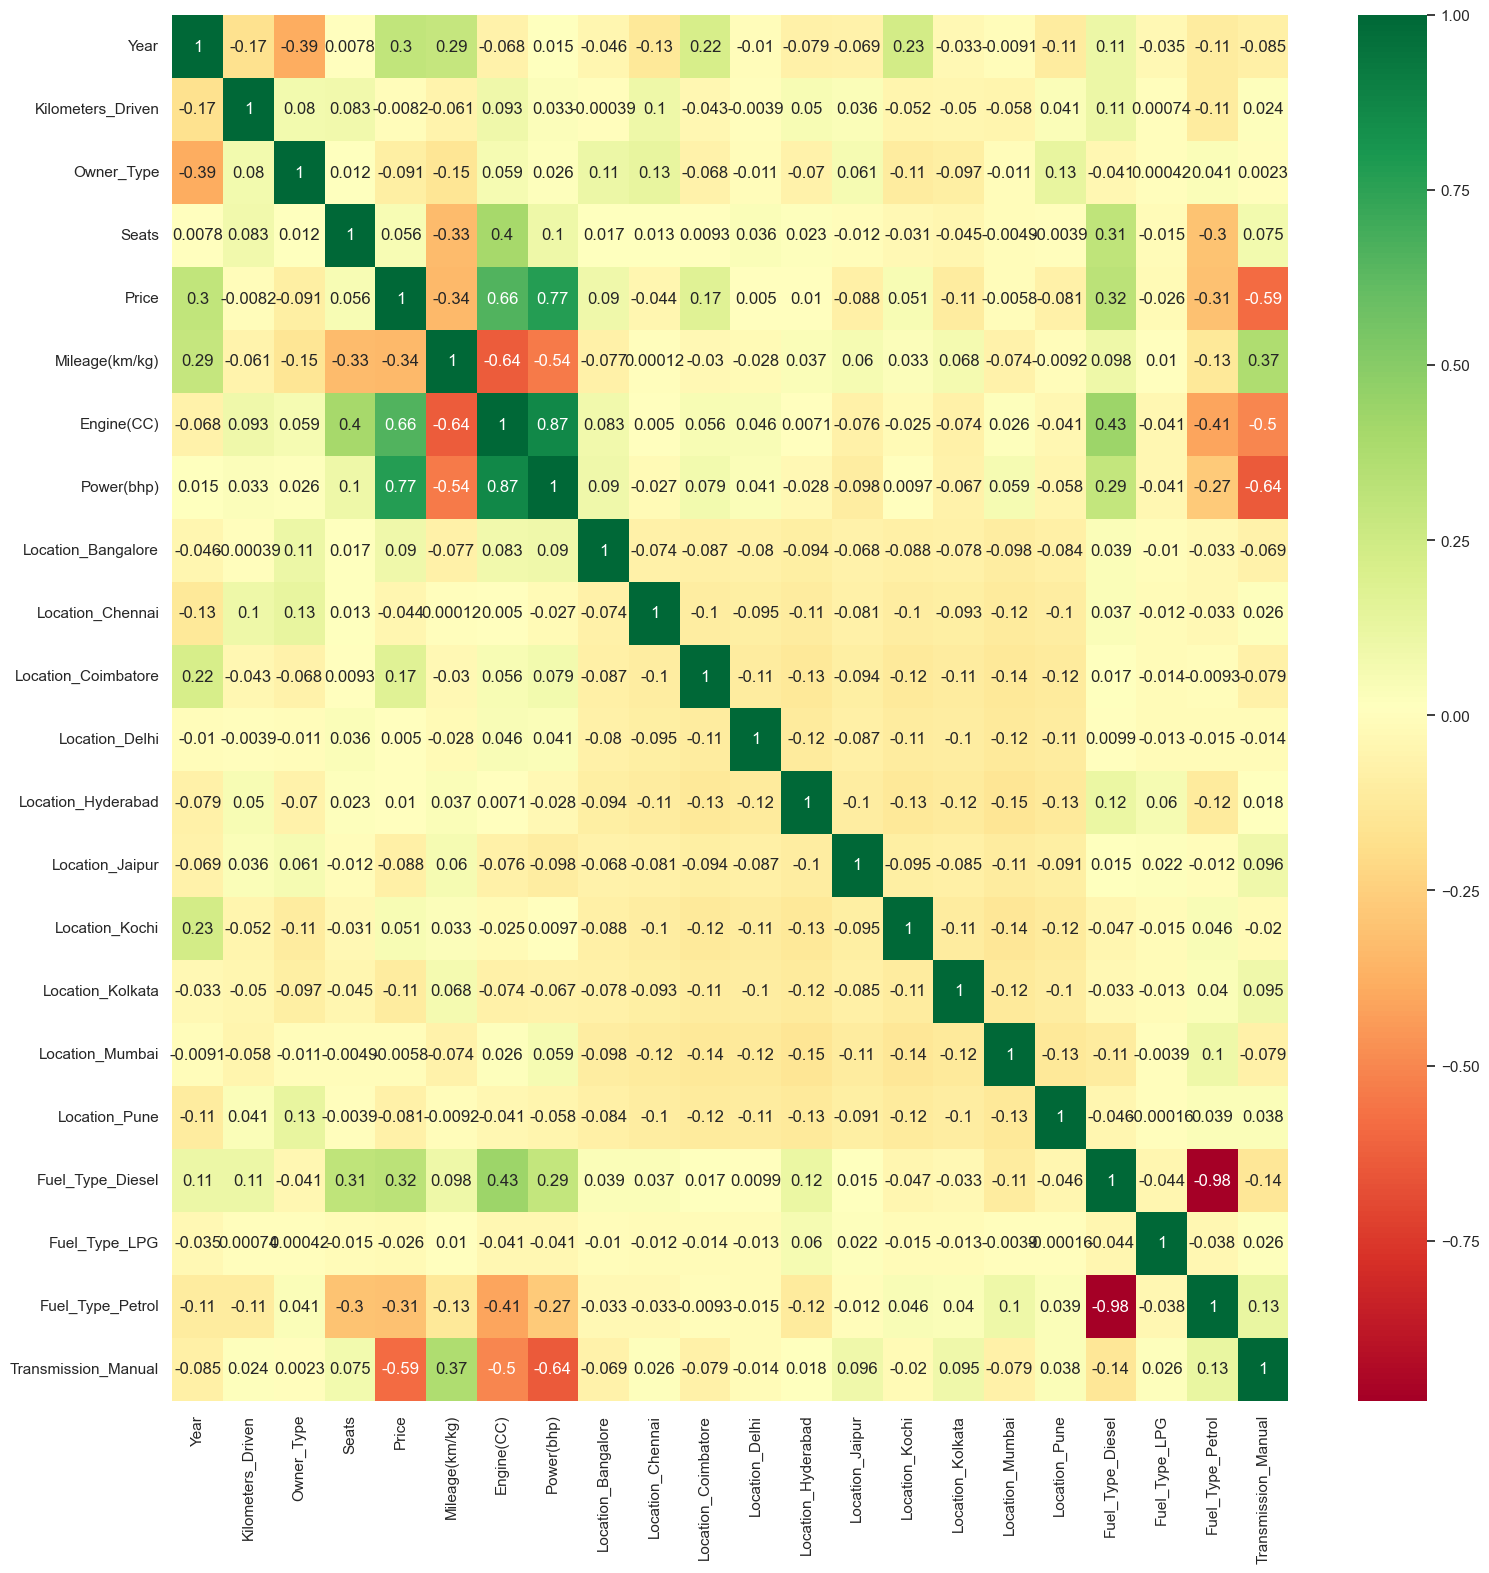

In [104]:
# feature heatmap
plt.figure(figsize=(18,18))
sns.heatmap(final_train.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [105]:
from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

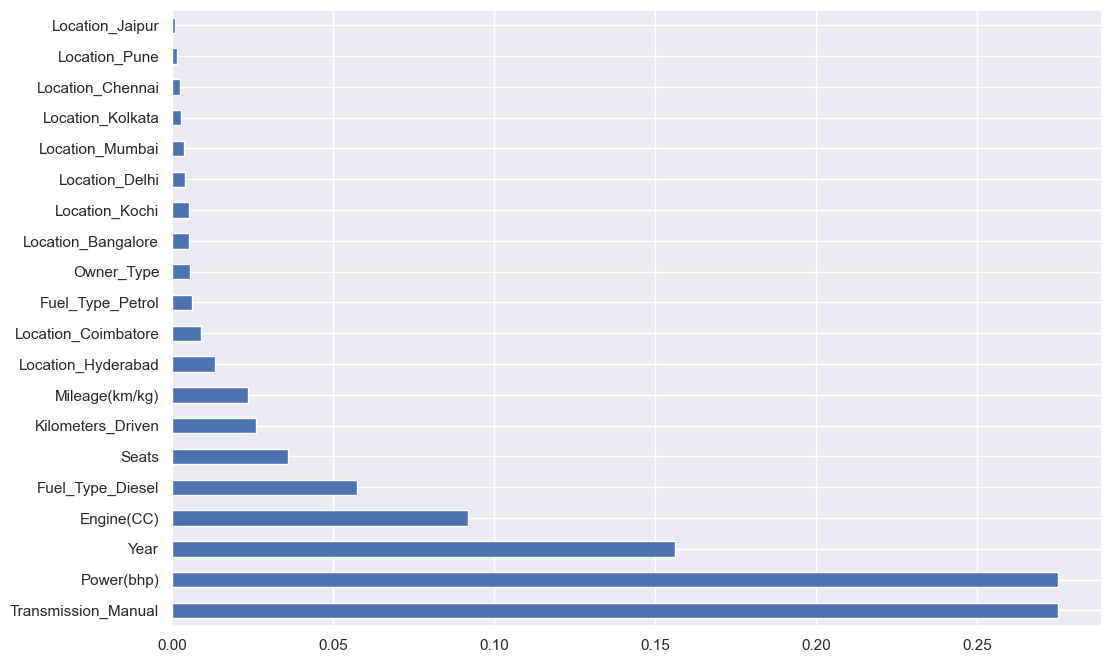

In [106]:
# vis feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [108]:
# model building
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [109]:
# linear regression
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Traing set:  0.7083070284244637
Accuracy on Testing set:  0.6991016530826974


In [110]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)
print("Accuracy on Traing set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))

Accuracy on Traing set:  0.9841156685117058
Accuracy on Testing set:  0.9111137765967671


In [112]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

		Error Table
Mean Absolute Error      :  1.5106735035460996
Mean Squared  Error      :  10.416613822122448
Root Mean Squared  Error :  3.2274779351875433
R Squared Error          :  0.9111137765967671


In [15]:
# # removing outlier
# for col in ['Engine','Power','Kilometers_Driven','Mileage','Price']:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 2.5*IQR
#     upper_bound = Q3 + 2.5*IQR
#     df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [33]:
# df['Name'].nunique()

In [34]:
# df['Company'] = df['Name'].str.split(expand=True)[0].str.lower()
# df['Model'] = df['Name'].str.split().str[0:2].str.join(' ').str.lower()
# df.drop(columns = ['Name'], inplace = True)

In [35]:
# df['Company'].nunique() , df['Model'].nunique()

In [23]:
# univariate analysis

# # make the data fall in certain range.
# def remove_outliers(df, col, lower, upper):
#     df = df[ (df[col]>lower) & (df[col]<upper) ]
#     return df

In [24]:
# ploting histogram & boxplot for col parameter
# def plot_num(df, col):
#     fig ,ax = plt.subplots(1,2,figsize=(16,4))
#     sns.histplot(df,x=col,kde=True,ax=ax[0])
#     sns.boxplot(df,x=col,ax=ax[1])
#     ax[0].set_title(f'Distribution of {col}')
#     ax[1].set_title(f'{col} Boxplot')
#     fig.show();

In [36]:
# year
# plt.figure(figsize=(15,5))
# sns.countplot(df,x='Year');
# plt.title('Distribution of Year Column');

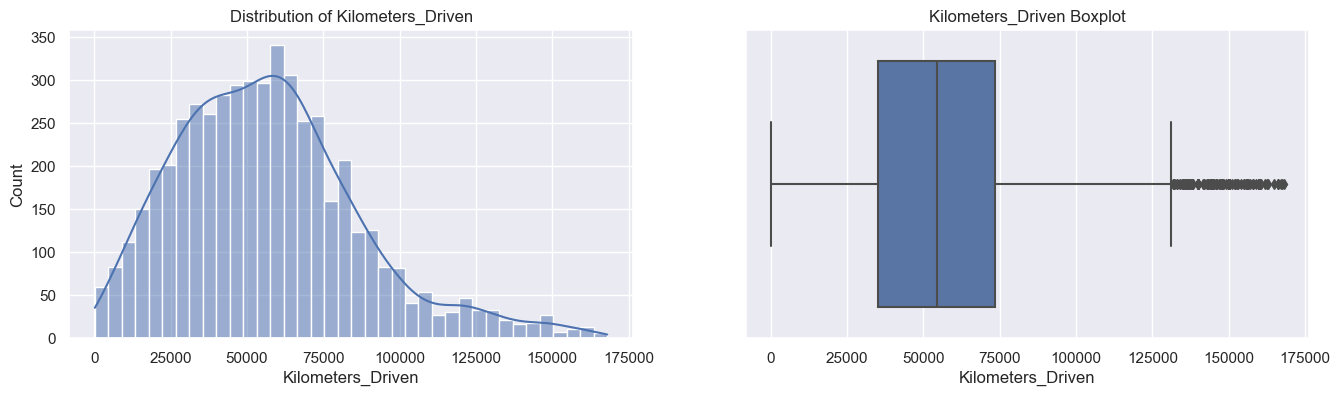

In [26]:
# # kilometers driven
# plot_num(df,'Kilometers_Driven')

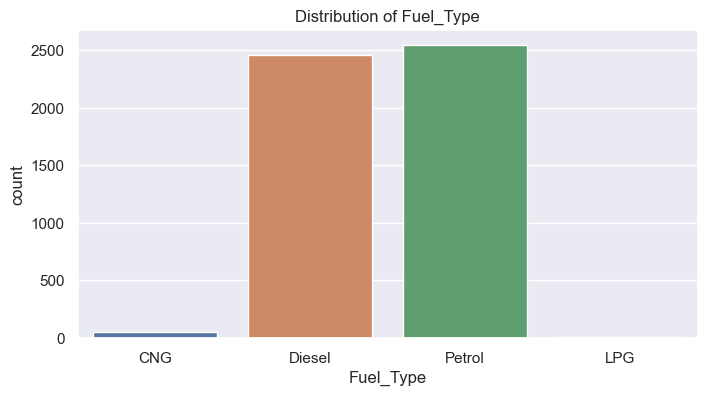

In [27]:
# # fuel type
# plt.figure(figsize=(8,4))
# sns.countplot(df,x='Fuel_Type');
# plt.title('Distribution of Fuel_Type');

In [28]:
# df['Fuel_Type'].value_counts()

Petrol    2548
Diesel    2459
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64

In [29]:
# # exclude Fuel_Types with low frequency from the dataset
# df = df[~df['Fuel_Type'].isin(['LPG','Electric'])]

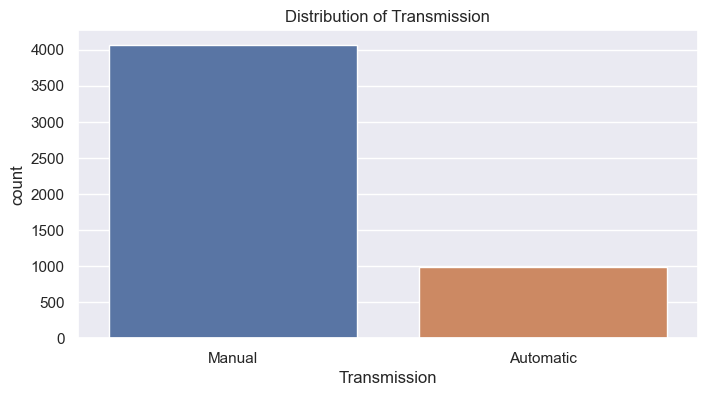

In [30]:
# # transmission
# plt.figure(figsize=(8,4))
# sns.countplot(df,x='Transmission');
# plt.title('Distribution of Transmission');

In [31]:
# df['Transmission'].value_counts()

Manual       4068
Automatic     994
Name: Transmission, dtype: int64

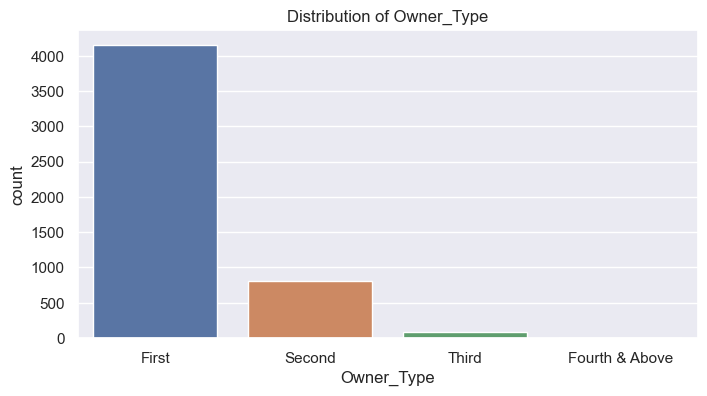

In [32]:
# owner type
# plt.figure(figsize=(8,4))
# sns.countplot(df,x='Owner_Type');
# plt.title('Distribution of Owner_Type');

In [33]:
# # endcode owener type
# df['Owner_Type'] = df['Owner_Type'].map({"First":3,"Second":2,"Third":1,"Fourth & Above":0})

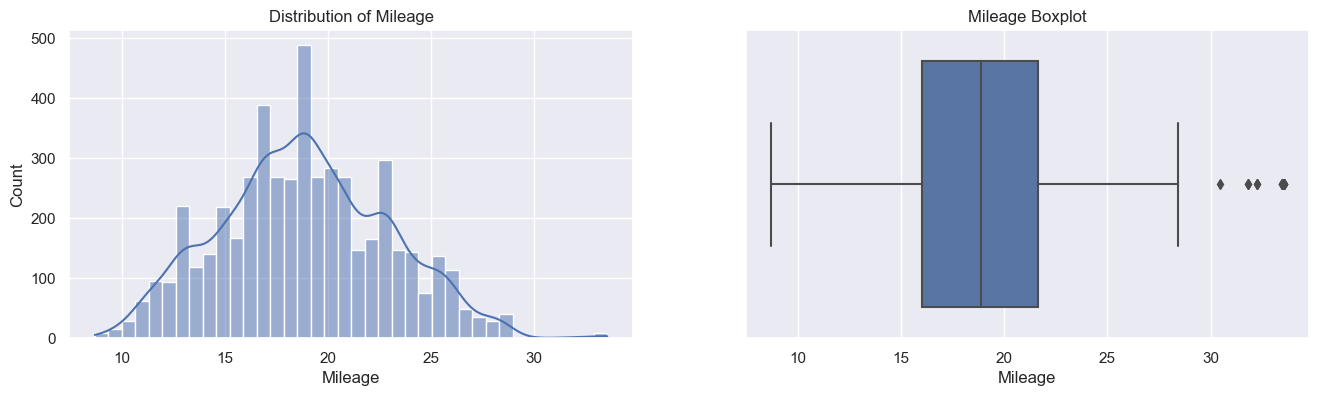

In [34]:
# # mileage
# plot_num(df,'Mileage')

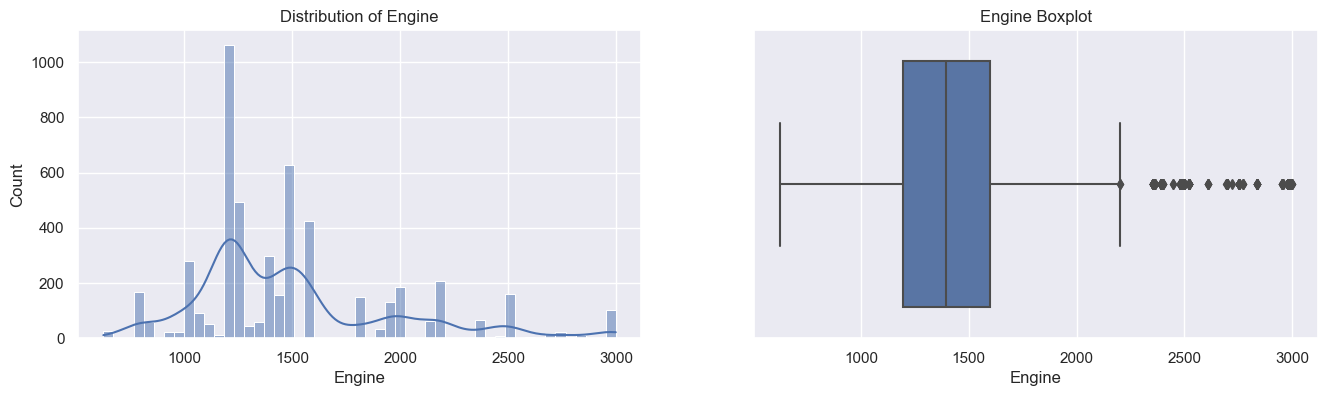

In [35]:
# # engine
# plot_num(df,'Engine')

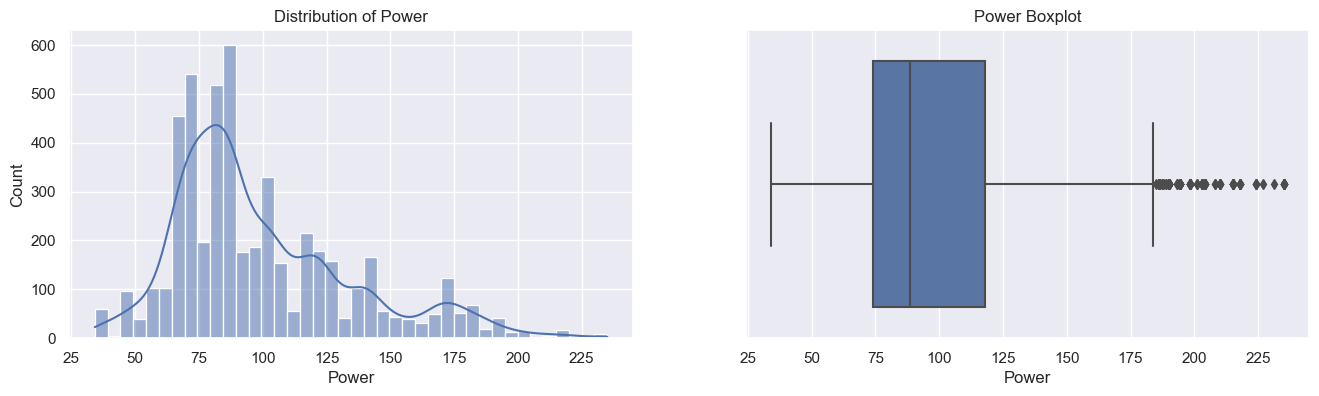

In [36]:
# # power
# plot_num(df,'Power')

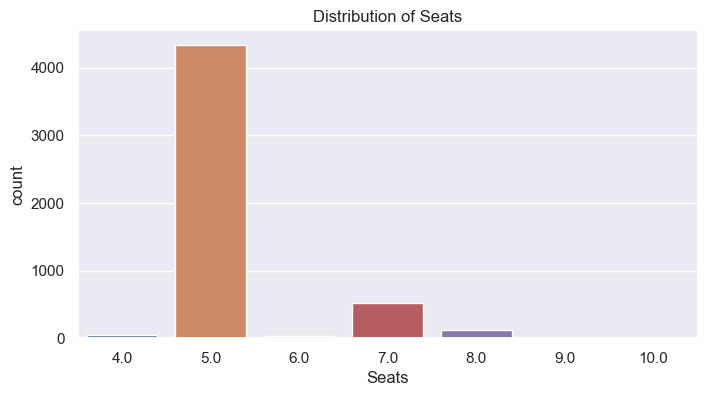

In [37]:
# # seats
# plt.figure(figsize=(8,4))
# sns.countplot(df,x='Seats');
# plt.title('Distribution of Seats');

In [38]:
# df['Seats'].value_counts()

5.0     4339
7.0      516
8.0      119
4.0       54
6.0       26
10.0       4
9.0        3
Name: Seats, dtype: int64

In [39]:
# exclude Seats with low frequency
# df = df[df.Seats.between(5,8)]

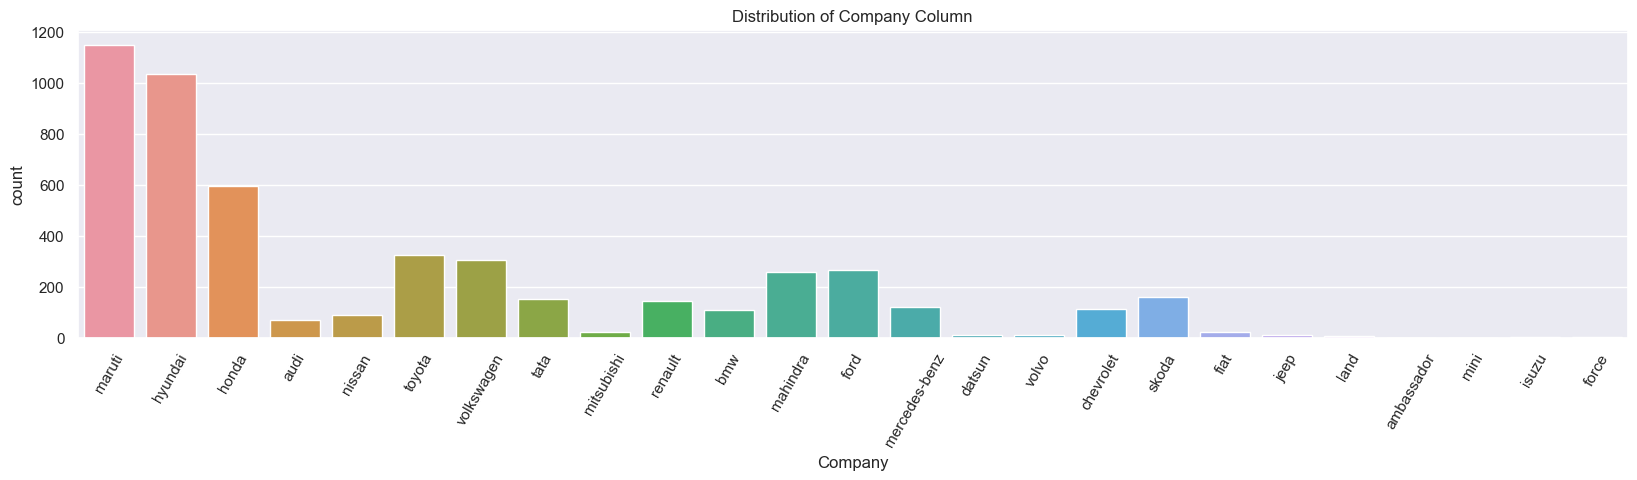

In [40]:
# # company
# plt.figure(figsize=(20,4))
# sns.countplot(df,x='Company');
# plt.xticks(rotation=60)
# plt.title('Distribution of Company Column');

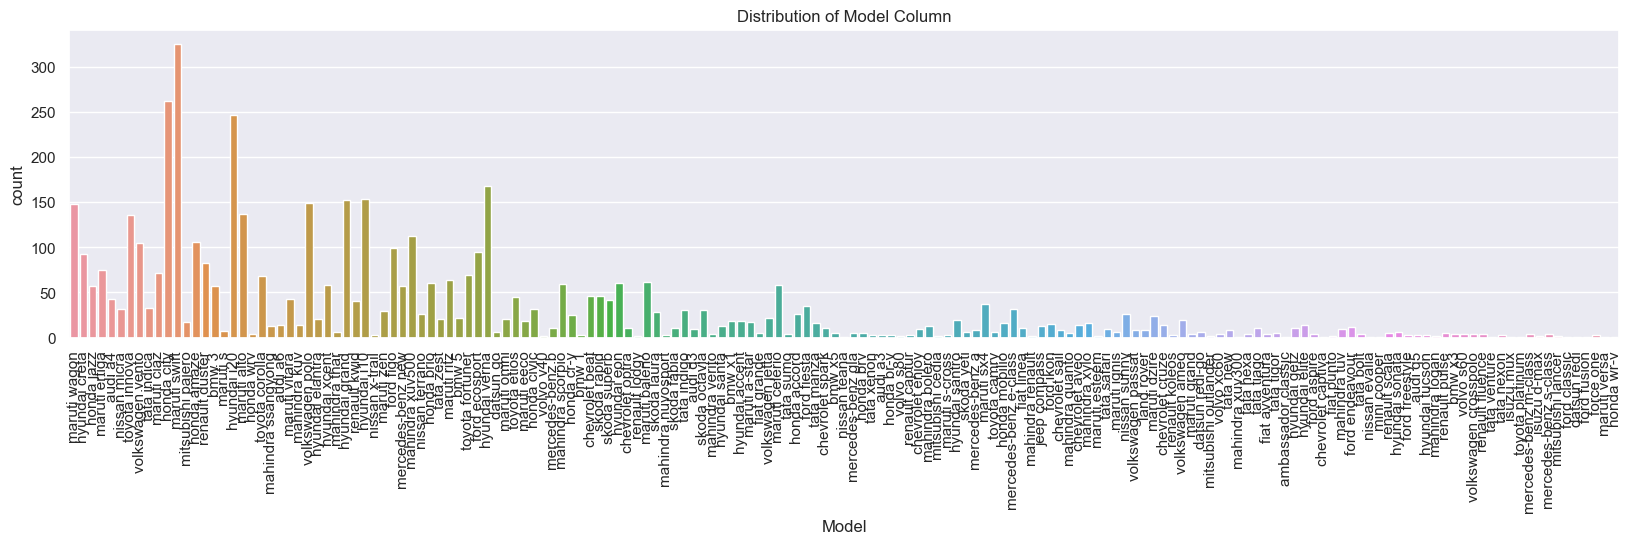

In [41]:
# # model
# plt.figure(figsize=(20,4))
# sns.countplot(df,x='Model',orient='h');
# plt.xticks(rotation=90)
# plt.title('Distribution of Model Column');

In [42]:
# df.Model.value_counts()

maruti swift          325
honda city            262
hyundai i20           246
hyundai verna         168
hyundai i10           154
                     ... 
nissan evalia           1
chevrolet captiva       1
ambassador classic      1
mahindra xuv300         1
honda wr-v              1
Name: Model, Length: 165, dtype: int64

In [43]:
# # exclude car models with low frequency
# threshold = 10
# counts = df.Model.value_counts()
# to_drop = counts[counts<threshold].index.tolist()
# df = df[~df['Model'].isin(to_drop)]

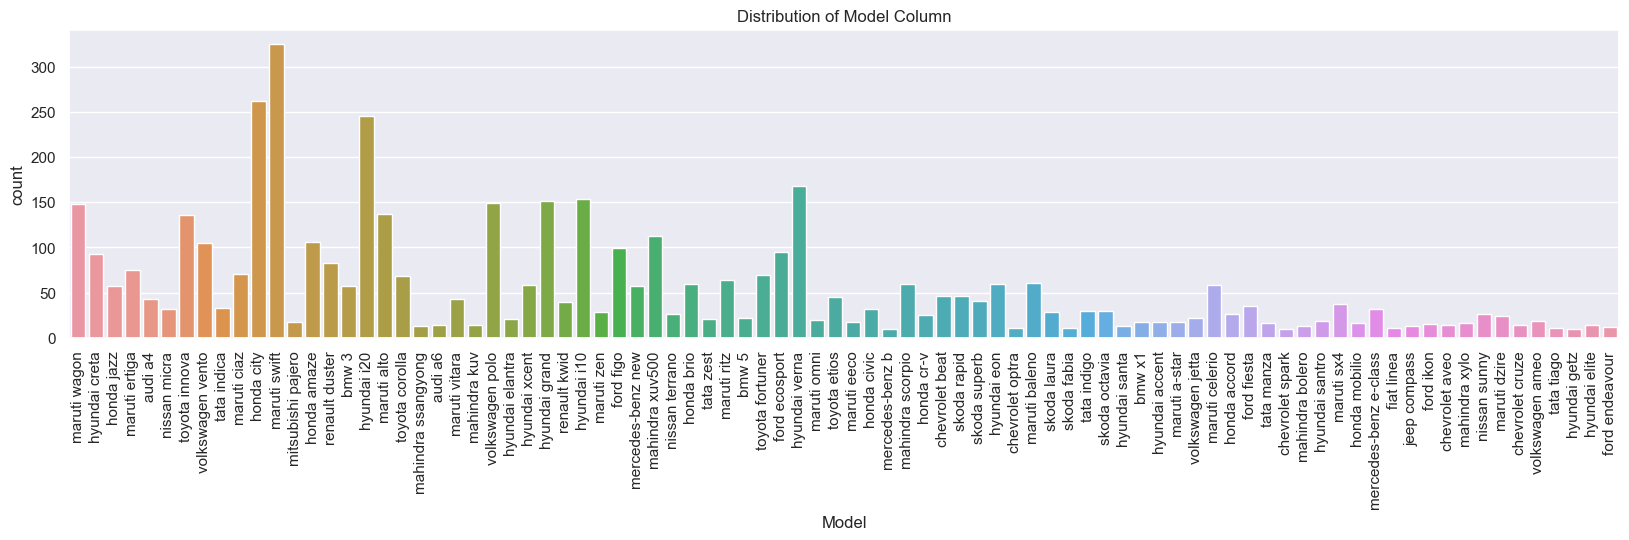

In [44]:
# # model
# plt.figure(figsize=(20,4))
# sns.countplot(df,x='Model',orient='h');
# plt.xticks(rotation=90)
# plt.title('Distribution of Model Column');

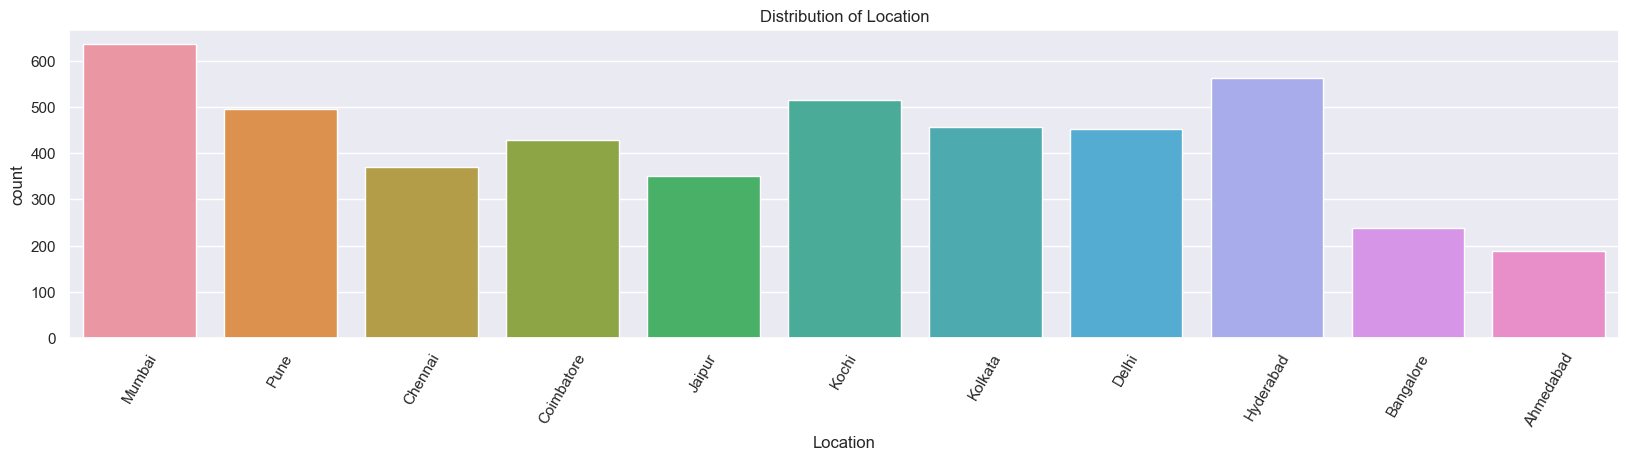

In [45]:
# # location
# plt.figure(figsize=(20,4))
# sns.countplot(df,x='Location');
# plt.xticks(rotation=60)
# plt.title('Distribution of Location');

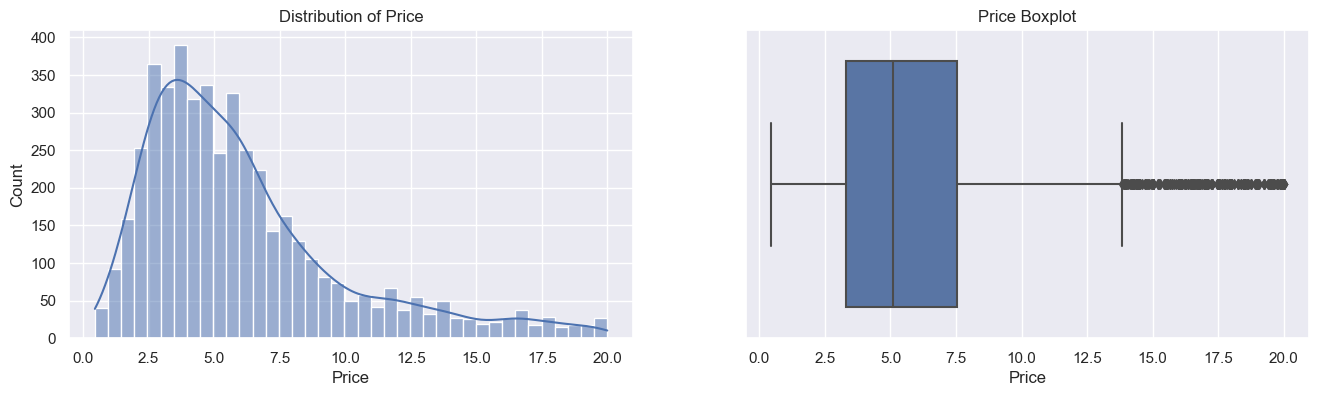

In [46]:
# # price
# plot_num(df,'Price')

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
# from sklearn.linear_model import LinearRegression, Ridge , Lasso 
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder,PolynomialFeatures
# from sklearn.pipeline import Pipeline, make_pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.compose import ColumnTransformer, make_column_transformer
# from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor

In [47]:
# ## bivariate analysis

# # year & price
# agg = df.groupby('Year')['Price'].mean().sort_values(ascending=False)
# fig = px.bar(agg , color = agg.index , width=700 , height =500,title='Year vs Mean Price')
# fig.show()

In [48]:
# # kilometers driven & price
# fig = px.scatter(df, x='Kilometers_Driven', y='Price' , width=700 , \
#                  height =500, title='Kilometers Driven vs Mean Price')
# fig.show()

In [49]:
# # fuel type & price
# agg = df.groupby('Fuel_Type')['Price'].mean().sort_values(ascending = False)
# fig = px.bar(agg , color = agg.index , width=700 , height =500,title='Fuel Type vs Mean Price')
# fig.show()

In [50]:
# # transmission & price
# agg = df.groupby('Transmission')['Price'].mean().sort_values(ascending=False)
# fig = px.bar(agg , color = agg.index , width=700 , height =500,\
#              title='Transmission Type vs Mean Price')
# fig.show()

In [51]:
# # owner type & price
# agg = df.groupby('Owner_Type')['Price'].mean().sort_values(ascending=False)
# fig = px.bar(agg , color = agg.index , width=700 , height =500,title='Owner Type vs Mean Price')
# fig.show()

In [52]:
# # mileage & price
# fig = px.scatter(df,x='Mileage',y='Price' , width=700 , height =500,title='Mileage vs Mean Price')
# fig.show()

In [53]:
# # engine & price
# fig = px.scatter(df,x='Engine',y='Price' , width=700 , height =500,title='Engine vs Mean Price')
# fig.show()

In [54]:
# # power & price
# fig = px.scatter(df,x='Power',y='Price' , width=700 , height =500,title='Power vs Mean Price')
# fig.show()

In [55]:
# # seats & price
# agg = df.groupby('Seats')['Price'].mean().sort_values(ascending=False)
# fig = px.bar(agg , color = agg.index , width=700 , height =500,title='Seats vs Mean Price')
# fig.show()

In [56]:
# # company & price
# agg = df.groupby('Company')['Price'].mean().sort_values(ascending=False)
# fig = px.bar(agg , color = agg.index , width=900 , height =700,\
#              title='Company vs Mean Price')
# fig.show()

In [57]:
# # location & price
# agg = df.groupby('Location')['Price'].mean().sort_values(ascending=False)
# fig = px.bar(agg , color = agg.index , width=900 , height =700,title='Location vs Mean Price')
# fig.show()

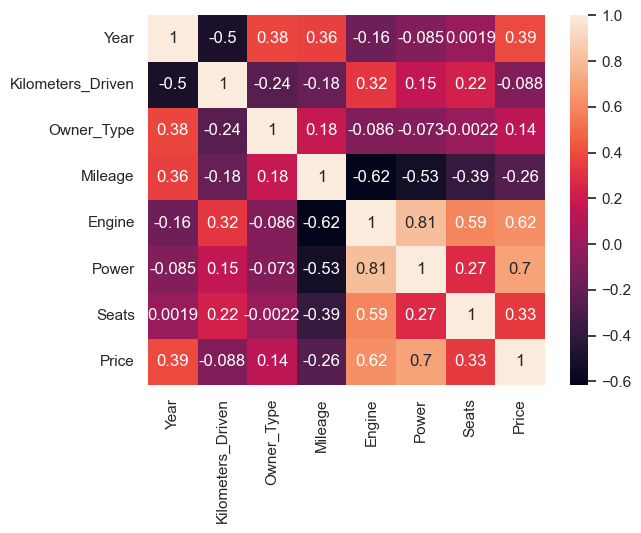

In [58]:
# # heatmap
# sns.heatmap(df.corr(),annot=True);

In [59]:
# # building model

# # splitting data to features & target
# target = ['Price']
# features = df.columns.drop(['Price'])


# X = df[features]
# y = df[target]

# num_features = X.select_dtypes('number').columns
# cat_features = X.select_dtypes('object').columns

In [60]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# # data preprocessing
# #numerical pipeline
# num_pipeline = make_pipeline(
#                 SimpleImputer(),
#                 StandardScaler(),
#                 PolynomialFeatures(degree=2)
# )

# #categorical pipeline
# cat_pipeline = make_pipeline(
#                 SimpleImputer(strategy='most_frequent'),
#                 OneHotEncoder()
                
# )

# #full pipeline
# preprocessor = make_column_transformer(
#                 (num_pipeline,num_features),
#                 (cat_pipeline,cat_features)
# )

In [62]:
# # modeling
# # linear regression
# lin_reg = make_pipeline(preprocessor, LinearRegression())

In [67]:
# # hyperparameter tunning
# param_grid = {'columntransformer__pipeline-1__polynomialfeatures__degree':[2,3,4,5,6]}
# Grid_search = GridSearchCV(    lin_reg, 
#                                param_grid = param_grid,
#                                cv = 5,
#                                scoring='r2',
#                                n_jobs=-1 # automatically use all of the cores in my machine
#                           )
# Grid_search.fit(X_train,y_train)
# # Grid_search.best_params_
# print('Best Score: %s' % Grid_search.best_score_)
# print('Best Hyperparameters: %s' % Grid_search.best_params_)

Best Score: 0.9312959343230276
Best Hyperparameters: {'columntransformer__pipeline-1__polynomialfeatures__degree': 2}


In [64]:
# # model training
# lin_reg.fit(X_train,y_train);

# # measuring accuracy
# pred_train = lin_reg.predict(X_train)
# print("Training set Accuracy:",round(r2_score(pred_train, y_train),4)*100)
# print("Testing set Accuracy:",round(lin_reg.score(X_test, y_test),4)*100)

# #Cross validation
# scores = cross_val_score(lin_reg, X, y, cv=5)
# print("CV Scores Mean", round(scores.mean(), 4)*100)
# print("CV Scores standard deviation", scores.std())

Training set Accuracy: 93.49
Testing set Accuracy: 90.88000000000001
CV Scores Mean 92.67
CV Scores standard deviation 0.007318090855012904


In [68]:
# # ridge
# ridge = make_pipeline(preprocessor, Ridge(alpha=0.01))

In [69]:
# # hyperparameter tunning
# param_grid = {'ridge__alpha':[0.01,0.1,1,10,100],
#              'columntransformer__pipeline-1__polynomialfeatures__degree':[2,3,4,5,6]}
# Grid_search = GridSearchCV(    ridge, 
#                                param_grid = param_grid,
#                                cv = 5,
#                                scoring='r2')
# Grid_search.fit(X_train,y_train)
# Grid_search.best_params_

{'columntransformer__pipeline-1__polynomialfeatures__degree': 2,
 'ridge__alpha': 0.01}

In [67]:
# # ridge model training
# ridge.fit(X_train,y_train);

# # measuring accuracy
# pred_train = ridge.predict(X_train)
# print("Training set Accuracy:",round(r2_score(pred_train,y_train),4)*100)
# print("Testing set Accuracy:",round(ridge.score(X_test,y_test),4)*100)

# # cross validation
# scores = cross_val_score(ridge, X, y, cv=5)
# print("CV Scores Mean", round(scores.mean(), 4)*100)
# print("CV Scores standard deviation", scores.std())

Training set Accuracy: 93.97
Testing set Accuracy: 93.30000000000001
CV Scores Mean 93.58999999999999
CV Scores standard deviation 0.005754243077556038


In [70]:
# # lasso
# lasso = make_pipeline(preprocessor, Lasso(alpha=0.001))

In [71]:
# # hyperparameter tunning
# param_grid= {
#     "lasso__alpha":[0.001,0.01,0.1,1,10,100],
#     "columntransformer__pipeline-1__polynomialfeatures__degree":[2,3,4,5]}

# grid_search = GridSearchCV(
#             lasso,
#             param_grid=param_grid,
#             scoring='r2',
#             cv=5
# )
# grid_search.fit(X_train,y_train);
# grid_search.best_params_

{'columntransformer__pipeline-1__polynomialfeatures__degree': 2,
 'lasso__alpha': 0.001}

In [72]:
# # model training
# lasso.fit(X_train,y_train);

# # measuring accuracy
# pred_train = lasso.predict(X_train)
# print("Training set Accuracy:",round(r2_score(pred_train,y_train),4)*100)
# print("Testing set Accuracy:",round(lasso.score(X_test,y_test),4)*100)

# # cross validation
# scores = cross_val_score(lasso,X,y,cv=5)
# print("CV Scores Mean",round(scores.mean(),4)*100 )
# print("CV Scores standard deviation",scores.std() )

Training set Accuracy: 93.03
Testing set Accuracy: 90.63
CV Scores Mean 92.39
CV Scores standard deviation 0.008007681834193056
